In [66]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import matplotlib.pyplot as plt
import time

In [87]:
data = {
    "learningFilePath": '/Users/sangminlee/model-factory/restapiserver/src/main/resources/피마족_인디언_당뇨병_발병_데이터셋.csv',
    "modelPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/model.h5",
    "diagramPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/diagram.svg",
    "prediction": "binary",
    "inputColumns": [
        "임신 횟수",
        "혈장 포도당 농도",
        "이완기 혈압",
        "삼두근 피부 두께",
        "혈청 인슐린",
        "체질량 지수",
        "당뇨 직계 가족력",
        "나이"
    ],
    "outputColumns": [
        "당뇨병 발병 여부"
    ],
    "batchSize": 64,
    "epoch": 100,
    "lossFunction": "binary_crossentropy",
    "optimizerFunction": "adam",
    "memberId": 1,
    "layers": [
        {
            "number": 0,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 1,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 2,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 3,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 4,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 5,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 6,
            "activationFunction": "sigmoid",
            "neuronCount": 1
        },
    ]
}

In [88]:
# 파일 불러오기
dataset = pd.read_csv(data['learningFilePath'])

# 학습셋, 검증셋, 시험셋 분리
x_train = dataset[data.get('inputColumns')].values.astype('float32')
train_length = int(len(x_train) * 0.7)
val_length = int(len(x_train) * 0.2)
x_test = x_train[train_length + val_length:]
x_val = x_train[train_length: train_length + val_length]
x_train = x_train[:train_length]

# 학습셋, 검증셋, 시험셋 분리
y_train = dataset[data.get('outputColumns')].values.astype('float32')
y_test = y_train[train_length + val_length:]
y_val = y_train[train_length: train_length + val_length]
y_train = y_train[:train_length]

x_length = len(x_test[0])
y_length = len(y_test[0])

In [136]:
def review (model, hist):
    scores = model.evaluate(x_test, y_test)
    print('%s: %.2f%%' %(model.metrics_names[0], scores[0] * 100))

    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()
    
def visualize(model):
    return SVG(model_to_dot(model, show_shapes=True, dpi=65)
                .create(prog='dot', format='svg'))

In [137]:
layers = data.get('layers')

In [138]:
model = Sequential()
for layer in layers:
    if layer['number'] == 0:
        model.add(Dense(layer['neuronCount'],
                       input_dim = x_length,
                       activation = layer['activationFunction']))

    else:
        activation = layer['activationFunction']
        neuron = layer['neuronCount']
        if activation == 'dropout':
            model.add(Dropout(neuron * 0.01))
        else:
            model.add(Dense(neuron, activation=activation))

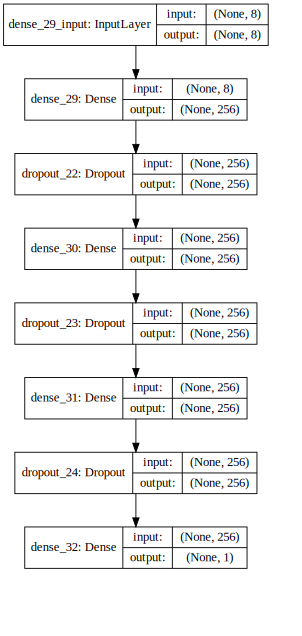

In [139]:
visualize(model)

In [140]:
class CustomHistory(keras.callbacks.Callback):
    def init(self, totalEpoch):
        self.epochCount = 0
        self.epochCycle = totalEpoch * 0.01
    
    def on_epoch_end(self, batch, logs={}):
        self.epochCount += 1
        if self.epochCount % self.epochCycle == 0:
            ''''''
#             time.sleep(5)
#             print('===== sleep =====')
#             print()
#             print('\n=== train loss ===')
#             print(logs.get('loss'))
#             print('\n=== val loss ===')
#             print(logs.get('val_loss'))
#             print('\n=== train acc ===')
#             print(logs.get('accuracy'))
#             print('\n=== val acc ===')
#             print(logs.get('val_accuracy'))
#             print()

In [141]:
data.get('epoch')

100

In [142]:
custom_hist = CustomHistory()
custom_hist.init(data.get('epoch'))

In [143]:
model.compile(optimizer=data.get('optimizerFunction'),
                loss=data.get('lossFunction'),
                metrics=['accuracy'])

In [144]:
hist = model.fit(x_train, y_train, epochs=data.get('epoch'),
                 callbacks=[custom_hist], batch_size=data.get('batchSize'),
                 validation_data=(x_val, y_val))

Train on 537 samples, validate on 153 samples
Epoch 1/100
537/537 [==============================] - 0s 565us/step - loss: 3.3551 - accuracy: 0.5456 - val_loss: 1.4219 - val_accuracy: 0.4052
Epoch 2/100
537/537 [==============================] - 0s 46us/step - loss: 2.6280 - accuracy: 0.5642 - val_loss: 1.7235 - val_accuracy: 0.3464
Epoch 3/100
537/537 [==============================] - 0s 49us/step - loss: 2.0611 - accuracy: 0.5642 - val_loss: 0.7970 - val_accuracy: 0.6863
Epoch 4/100
537/537 [==============================] - 0s 54us/step - loss: 1.5516 - accuracy: 0.5642 - val_loss: 0.8076 - val_accuracy: 0.6928
Epoch 5/100
537/537 [==============================] - 0s 63us/step - loss: 1.1937 - accuracy: 0.6369 - val_loss: 0.8354 - val_accuracy: 0.4314
Epoch 6/100
537/537 [==============================] - 0s 67us/step - loss: 1.1698 - accuracy: 0.5549 - val_loss: 0.7674 - val_accuracy: 0.6275
Epoch 7/100
537/537 [==============================] - 0s 73us/step - loss: 1.0526 - accu

537/537 [==============================] - 0s 44us/step - loss: 0.6103 - accuracy: 0.6816 - val_loss: 0.5771 - val_accuracy: 0.6667
Epoch 58/100
537/537 [==============================] - 0s 48us/step - loss: 0.5833 - accuracy: 0.7132 - val_loss: 0.5942 - val_accuracy: 0.6732
Epoch 59/100
537/537 [==============================] - 0s 47us/step - loss: 0.6074 - accuracy: 0.6760 - val_loss: 0.5929 - val_accuracy: 0.6536
Epoch 60/100
537/537 [==============================] - 0s 46us/step - loss: 0.6123 - accuracy: 0.6816 - val_loss: 0.5920 - val_accuracy: 0.6797
Epoch 61/100
537/537 [==============================] - 0s 47us/step - loss: 0.6101 - accuracy: 0.6648 - val_loss: 0.5971 - val_accuracy: 0.6928
Epoch 62/100
537/537 [==============================] - 0s 46us/step - loss: 0.5897 - accuracy: 0.6927 - val_loss: 0.5953 - val_accuracy: 0.6863
Epoch 63/100
537/537 [==============================] - 0s 45us/step - loss: 0.6011 - accuracy: 0.6983 - val_loss: 0.5971 - val_accuracy: 0.673

78/78 [==============================] - 0s 50us/step
loss: 65.81%


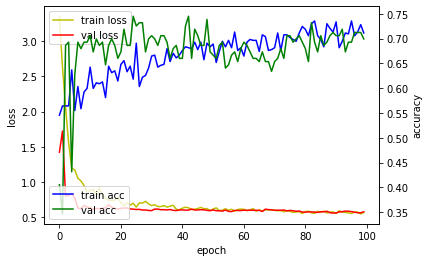

In [145]:
review(model, hist)

In [146]:
scores = model.evaluate(x_test, y_test)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))
print('%s: %.2f%%' %(model.metrics_names[0], scores[0] * 100))

78/78 [==============================] - 0s 48us/step
accuracy: 65.38%
loss: 65.81%


In [147]:
model.metrics_names

['loss', 'accuracy']